In [6]:
import pandas as pd
df = pd.read_csv('velib_data.csv')

In [7]:
df

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
0,NaN,213688169,14,NaN,NaN,21,1,1,1,1731677115,1731677400
1,NaN,17278902806,4,NaN,NaN,16,1,1,1,1731677359,1731677400
2,NaN,36255,3,NaN,NaN,18,1,1,1,1731677171,1731677400
3,NaN,251039991,8,NaN,NaN,17,1,1,1,1731677193,1731677400
4,NaN,85002689,25,NaN,NaN,35,1,1,1,1731677275,1731677400
...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,1733661079,1733662801
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,1733660920,1733662801
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,1733661023,1733662801
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,1733661029,1733662801


## Mapping latitude and longitude to station_id in Velib data

In [8]:
import requests

# API URL
api_url = "https://velib-metropole-opendata.smovengo.cloud/opendata/Velib_Metropole/station_information.json"

# Fetch data from the API
response = requests.get(api_url)
data = response.json()

# Extract station_id, lat, and lon
stations = data['data']['stations']
station_location_dict = {station['station_id']: (station['lat'], station['lon']) for station in stations}

# Print the dictionary (key: station_id, value: (lat, lon))
print(station_location_dict)

{213688169: (48.865983, 2.275725), 19179944124: (48.798922410229, 2.4537451531298), 17278902806: (48.778192750803, 2.3963020229163), 36255: (48.87929591733507, 2.3373600840568547), 251039991: (48.837525839067, 2.3360354080796), 85002689: (48.819428333369, 2.3433353751898), 2515829865: (48.93626891059109, 2.3588666820200914), 516709288: (48.855907555969, 2.3925706744194), 120827885: (48.875448033960744, 2.315508019010038), 66491398: (48.835092787824, 2.3534681351338), 37874517: (48.85165383178419, 2.3308077827095985), 210565680: (48.848563233059, 2.3204218259346), 210403080: (48.84389286531899, 2.3519663885235786), 210561800: (48.84708159081946, 2.321374788880348), 209063434: (48.91039875761846, 2.3851355910301213), 94555589: (48.81580226360801, 2.376804985105991), 19331959862: (48.779035118572, 2.4609763908985), 43195240: (48.835583838706, 2.2325500845909), 501862076: (48.862453313908, 2.1961666225454), 17486274358: (48.908168131015, 2.4530601033354), 210566542: (48.851296433665276, 2.

In [9]:
df['latitude'] = df['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[0])
df['longitude'] = df['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[1])

In [10]:
df

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,latitude,longitude
0,NaN,213688169,14,NaN,NaN,21,1,1,1,1731677115,1731677400,48.865983,2.275725
1,NaN,17278902806,4,NaN,NaN,16,1,1,1,1731677359,1731677400,48.778193,2.396302
2,NaN,36255,3,NaN,NaN,18,1,1,1,1731677171,1731677400,48.879296,2.337360
3,NaN,251039991,8,NaN,NaN,17,1,1,1,1731677193,1731677400,48.837526,2.336035
4,NaN,85002689,25,NaN,NaN,35,1,1,1,1731677275,1731677400,48.819428,2.343335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,1733661079,1733662801,48.855022,2.361232
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,1733660920,1733662801,48.851297,2.362453
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,1733661023,1733662801,48.870406,2.323244
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,1733661029,1733662801,48.819116,2.396664


## Dropping null values and cleaning api_calltime 

In [11]:
df_no_na = df.dropna()

In [12]:
df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')

C:\Users\gerry\AppData\Local\Temp\ipykernel_18892\3723464068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
C:\Users\gerry\AppData\Local\Temp\ipykernel_18892\3723464068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')


In [13]:
df_no_na['api_calltime'] = df_no_na['api_calltime'].dt.floor('min')

C:\Users\gerry\AppData\Local\Temp\ipykernel_18892\4190275272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_calltime'] = df_no_na['api_calltime'].dt.floor('min')


In [14]:
df_no_na

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,latitude,longitude
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:00,48.865983,2.275725
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:00,48.778193,2.396302
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:00,48.879296,2.337360
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:00,48.837526,2.336035
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:00,48.819428,2.343335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:00,48.855022,2.361232
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:00,48.851297,2.362453
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:00,48.870406,2.323244
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:00,48.819116,2.396664


In [15]:
df_no_na.corr()

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,latitude,longitude
stationCode,1.000000,0.229713,-0.078663,-0.139160,0.097755,-0.033852,-0.127529,-0.078923,-0.078923,-0.002131,-0.000125,-0.079988,0.146756
station_id,0.229713,1.000000,-0.057565,-0.071936,0.007440,-0.098566,-0.370798,-0.274119,-0.274119,-0.029960,0.001511,-0.005568,-0.026407
num_bikes_available,-0.078663,-0.057565,1.000000,0.923588,0.569713,-0.464693,0.137220,0.177658,0.177658,0.056328,0.010026,-0.020690,-0.096544
num_bikes_available_mechanical,-0.139160,-0.071936,0.923588,1.000000,0.211097,-0.406414,0.103032,0.133724,0.133724,0.043899,0.007266,-0.065744,-0.133826
num_bikes_available_ebike,0.097755,0.007440,0.569713,0.211097,1.000000,-0.313555,0.128987,0.166292,0.166292,0.049509,0.009985,0.088181,0.040731
num_docks_available,-0.033852,-0.098566,-0.464693,-0.406414,-0.313555,1.000000,0.052932,0.038017,0.038017,0.004421,-0.017108,-0.005745,0.086413
is_installed,-0.127529,-0.370798,0.137220,0.103032,0.128987,0.052932,1.000000,0.776777,0.776777,0.394474,0.000137,0.183153,-0.162489
is_returning,-0.078923,-0.274119,0.177658,0.133724,0.166292,0.038017,0.776777,1.000000,1.000000,0.383193,-0.004368,0.133353,-0.116431
is_renting,-0.078923,-0.274119,0.177658,0.133724,0.166292,0.038017,0.776777,1.000000,1.000000,0.383193,-0.004368,0.133353,-0.116431
last_reported,-0.002131,-0.029960,0.056328,0.043899,0.049509,0.004421,0.394474,0.383193,0.383193,1.000000,0.062519,0.016903,-0.003868


## Weather data

In [16]:
df_weather = pd.read_csv('Paris_weather_data.csv')
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [17]:
df_weather

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,paris,2024-11-15 00:00:00,50.7,50.7,48.0,90.29,0.000,0,NaN,0.0,...,1029.5,99.0,6.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
1,paris,2024-11-15 01:00:00,50.7,50.7,47.1,87.44,0.000,0,NaN,0.0,...,1029.3,99.0,6.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
2,paris,2024-11-15 02:00:00,50.3,50.3,46.6,87.19,0.000,0,NaN,0.0,...,1028.9,99.0,9.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
3,paris,2024-11-15 03:00:00,50.0,47.4,46.1,86.50,0.000,0,NaN,0.0,...,1028.9,99.0,10.6,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
4,paris,2024-11-15 04:00:00,49.2,47.2,43.7,81.35,0.000,0,NaN,0.0,...,1028.6,99.0,13.4,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,paris,2024-12-08 19:00:00,44.9,38.5,42.5,91.06,0.003,100,rain,0.0,...,1012.1,97.6,6.6,0,0.0,0,NaN,"Rain, Overcast",rain,"07149099999,07156099999,07146099999,0715709999..."
572,paris,2024-12-08 20:00:00,44.9,39.3,42.8,92.03,0.000,0,NaN,0.0,...,1013.3,100.0,4.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
573,paris,2024-12-08 21:00:00,44.9,39.0,42.4,90.67,0.000,0,NaN,0.0,...,1014.4,95.5,7.7,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
574,paris,2024-12-08 22:00:00,44.2,38.1,41.2,89.43,0.000,0,NaN,0.0,...,1015.6,100.0,8.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."


## Removing faulty stations

In [18]:
df_no_na['time_differences'] = df_no_na['api_calltime'] - df_no_na['last_reported']
from datetime import timedelta
time_thresh = timedelta(hours = 1)
df_final = df_no_na[df_no_na['time_differences'] <= time_thresh]

df_final.drop(columns = ['time_differences'], inplace = True)

C:\Users\gerry\AppData\Local\Temp\ipykernel_18892\3887917301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['time_differences'] = df_no_na['api_calltime'] - df_no_na['last_reported']
C:\Users\gerry\AppData\Local\Temp\ipykernel_18892\3887917301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns = ['time_differences'], inplace = True)


## Merging data sets

In [19]:
df_all = pd.merge(df_final, df_weather, left_on='api_calltime', right_on='datetime', how='inner')

In [20]:
df_all

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,16107.0,213688169,13,10.0,3.0,22,1,1,1,2024-11-15 13:25:15,...,1027.3,99.0,14.9,52,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
1,44015.0,17278902806,5,1.0,4.0,15,1,1,1,2024-11-15 13:29:19,...,1027.3,99.0,14.9,52,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
2,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,...,1027.3,99.0,14.9,52,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
3,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,...,1027.3,99.0,14.9,52,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
4,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,...,1027.3,99.0,14.9,52,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754345,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,...,1007.5,97.6,10.6,62,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
754346,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,...,1007.5,97.6,10.6,62,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
754347,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,...,1007.5,97.6,10.6,62,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
754348,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,...,1007.5,97.6,10.6,62,0.2,1,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."


In [21]:
df_all.columns

Index(['stationCode', 'station_id', 'num_bikes_available',
       'num_bikes_available_mechanical', 'num_bikes_available_ebike',
       'num_docks_available', 'is_installed', 'is_returning', 'is_renting',
       'last_reported', 'api_calltime', 'latitude', 'longitude', 'name',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

## Engineering hour_of_the_week

In [22]:
df_all['hour_of_week'] = df_all['api_calltime'].dt.dayofweek * 24 + df_all['api_calltime'].dt.hour

In [23]:
import numpy as np
df_all['hour_of_week_sin'] = np.sin(2 * np.pi * df_all['hour_of_week'] / 168)
df_all['hour_of_week_cos'] = np.cos(2 * np.pi * df_all['hour_of_week'] / 168)

In [20]:
df_all.columns

Index(['stationCode', 'station_id', 'num_bikes_available',
       'num_bikes_available_mechanical', 'num_bikes_available_ebike',
       'num_docks_available', 'is_installed', 'is_returning', 'is_renting',
       'last_reported', 'api_calltime', 'latitude', 'longitude', 'name',
       'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'hour_of_week', 'hour_of_week_sin',
       'hour_of_week_cos'],
      dtype='object')

In [24]:
df_all_final = df_all[['station_id', 'num_bikes_available', 'latitude', 'longitude', 'temp', 'feelslike', 'precip', 'snow', 'windgust', 'hour_of_week_sin', 'hour_of_week_cos']]

In [25]:
df_all_final

,station_id,num_bikes_available,latitude,longitude,temp,feelslike,precip,snow,windgust,hour_of_week_sin,hour_of_week_cos
0,213688169,13,48.865983,2.275725,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
1,17278902806,5,48.778193,2.396302,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
2,36255,3,48.879296,2.337360,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
3,251039991,2,48.837526,2.336035,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
4,85002689,26,48.819428,2.343335,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
...,...,...,...,...,...,...,...,...,...,...,...
754345,476155906,43,48.855022,2.361232,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
754346,516395829,13,48.851297,2.362453,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
754347,315022587,45,48.870406,2.323244,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
754348,368766689,23,48.819116,2.396664,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562


## Correlation analysis

In [26]:
correlation_matrix = df_all_final.corr()

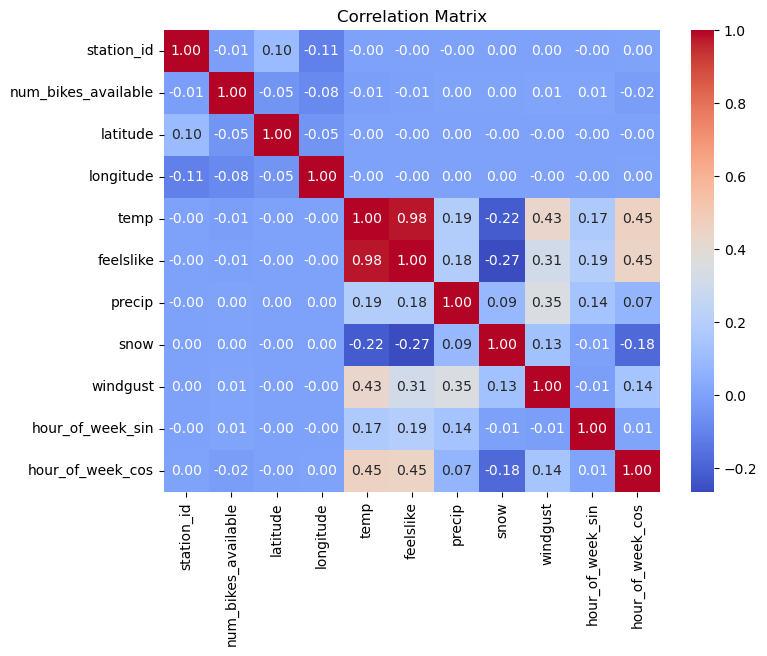

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
#station_target_mean = df_all_final.groupby('station_id')['num_bikes_available'].mean()
#df_all_final['station_id_encoded'] = df_all_final['station_id'].map(station_target_mean)

#df_all_final.drop(['station_id'], axis=1)

In [26]:
#from sklearn.preprocessing import MinMaxScaler

In [27]:
#min_max_scaler = MinMaxScaler()
#df_all_final['station_id_scaled'] = min_max_scaler.fit_transform(df_all_final[['station_id_encoded']])

In [28]:
#df = df_all_final.drop(['station_id', 'station_id_encoded'], axis=1)

In [28]:
df = df_all_final

In [29]:
df.columns

Index(['station_id', 'num_bikes_available', 'latitude', 'longitude', 'temp',
       'feelslike', 'precip', 'snow', 'windgust', 'hour_of_week_sin',
       'hour_of_week_cos'],
      dtype='object')

In [30]:
df.isnull().sum()

station_id             0
num_bikes_available    0
latitude               0
longitude              0
temp                   0
feelslike              0
precip                 0
snow                   0
windgust               0
hour_of_week_sin       0
hour_of_week_cos       0
dtype: int64

In [32]:
#df.to_csv('final_data.csv', index=False)

# MODEL TESTING

## Split Train-Test Data

In [31]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)  ----- changed station_id_scaled to lat and lon
X = df[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 2.3538625306555305
Mean Squared Error (MSE): 11.628055641280568
Root Mean Squared Error (RMSE): 3.4099934957827367
R² Score: 0.9067983861316179


            Feature  Importance
1         longitude    0.316030
0          latitude    0.308023
3  hour_of_week_cos    0.115252
2  hour_of_week_sin    0.099248
8          windgust    0.052628
5         feelslike    0.052407
4              temp    0.045442
6            precip    0.010513
7              snow    0.000457


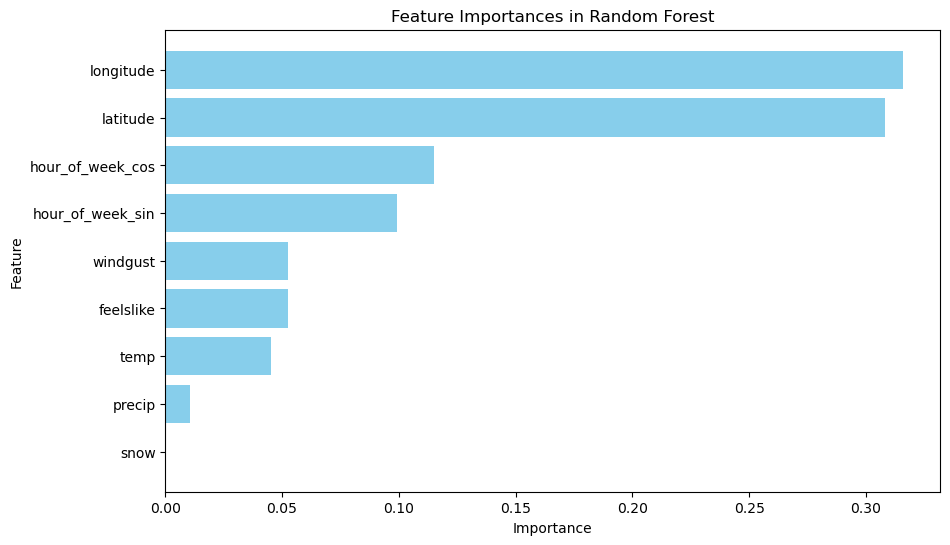

In [35]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

## Random Forest Regression Grid Search

In [348]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Reduced parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [10, 20, None],           # Maximum depth
    'min_samples_split': [2, 5],           # Minimum samples for split
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',  # Metric for evaluation
    cv=5,          # 5-fold cross-validation
    verbose=2,     # Progress output
    n_jobs=-1      # Use all available cores
)

# Time the process
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

end_time = time.time()

# Best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluation metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print results
print(f"Grid search completed in {(end_time - start_time) / 60:.2f} minutes.")
print("\nBest Parameters from Grid Search:")
print(best_params)

print("\nPerformance of Best Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf}")
print(f"R² Score: {r2_best_rf}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Grid search completed in 100.93 minutes.

Best Parameters from Grid Search:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Performance of Best Random Forest Model:
Mean Absolute Error (MAE): 2.343476536090674
Mean Squared Error (MSE): 11.50863401222907
Root Mean Squared Error (RMSE): 3.392437768364966
R² Score: 0.9077555787097886


## More granular Random Forest Regression Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Best parameters from the initial grid search
best_params = {
    'n_estimators': 200,        # From the initial results
    'max_depth': None,          # From the initial results
    'min_samples_split': 2      # From the initial results
}

# Focused parameter grid for more granularity
param_grid = {
    'n_estimators': [150, 200, 250, 300],       # Finer granularity around 200
    'max_depth': [None, 15, 20, 25],           # Finer tuning around None and typical depths
    'min_samples_split': [2, 3, 4],            # Testing small variations
    'min_samples_leaf': [1, 2],                # Adding minimum leaf samples for better regularization
    'max_features': ['sqrt', 'log2', None]     # Different strategies for feature selection
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',       # Evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Progress output
    n_jobs=-1           # Use all available CPU cores
)

# Time the process
start_time = time.time()

# Fit the model with the refined grid search
grid_search.fit(X_train, y_train)

end_time = time.time()

# Extract the best parameters and model
best_refined_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Predict using the best refined model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the performance
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print results
print(f"Refined grid search completed in {(end_time - start_time) / 60:.2f} minutes.")
print("\nBest Parameters from Refined Grid Search:")
print(best_refined_params)

print("\nPerformance of Best Refined Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Mean Squared Error (MSE): {mse_best_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf}")
print(f"R² Score: {r2_best_rf}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


## Separate data by location - maybe look at a few stations to reduce computation intensity and do the full data set overnight

In [330]:
station_ids_to_include = [82458977, 6497, 1062882947, 82468690, 576188379, 11375742, 27064639]

In [331]:
df2 = df[df['station_id'].isin(station_ids_to_include)]

In [332]:
df2

,station_id,num_bikes_available,latitude,longitude,temp,feelslike,precip,snow,windgust,hour_of_week_sin,hour_of_week_cos
55,576188379,5,48.838684,2.311042,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
358,82458977,3,48.836300,2.310446,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
778,27064639,3,48.840409,2.315437,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
947,1062882947,1,48.837884,2.308876,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
1104,82468690,1,48.836826,2.307170,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320
...,...,...,...,...,...,...,...,...,...,...,...
753692,27064639,3,48.840409,2.315437,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
753859,1062882947,4,48.837884,2.308876,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
754014,82468690,4,48.836826,2.307170,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562
754103,6497,5,48.836566,2.312707,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562


In [338]:
# Define features (X) and target variable (y)  ----- changed station_id_scaled to lat and lon
X = df2[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df2['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1.895731874145007
Mean Squared Error (MSE): 7.89047633378933
Root Mean Squared Error (RMSE): 2.8089991694177003
R² Score: 0.8176119278369459


## select one station to plot using predictions from ALL stations

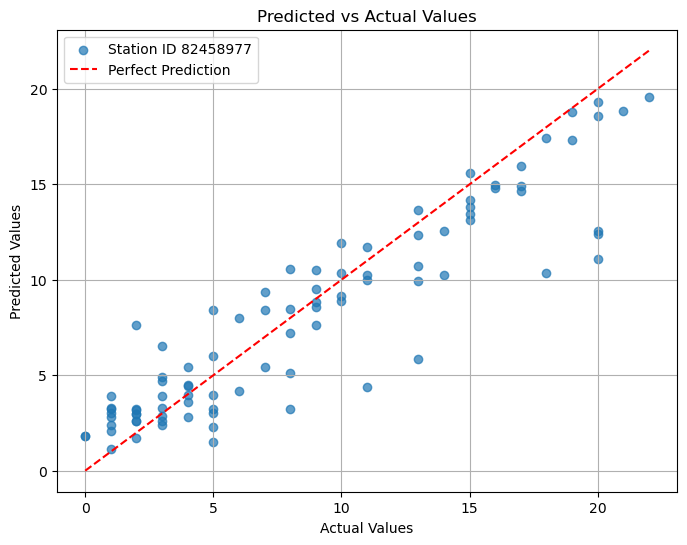

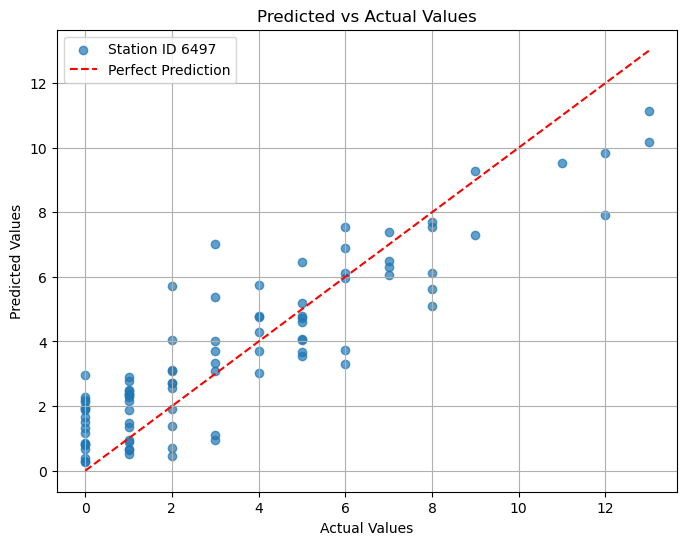

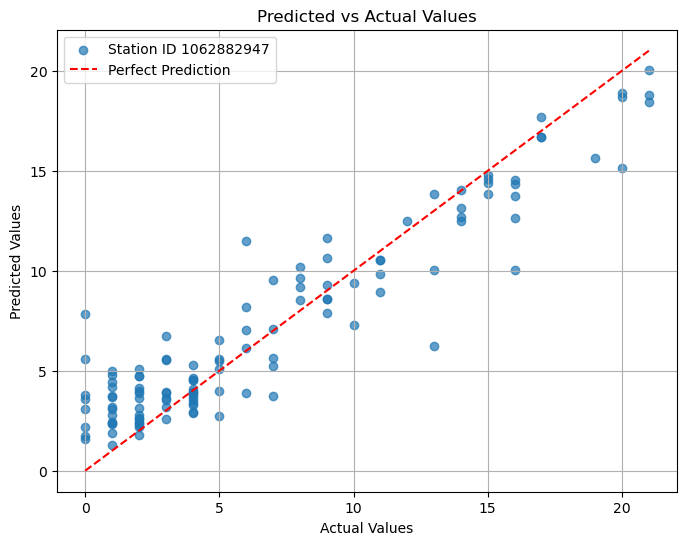

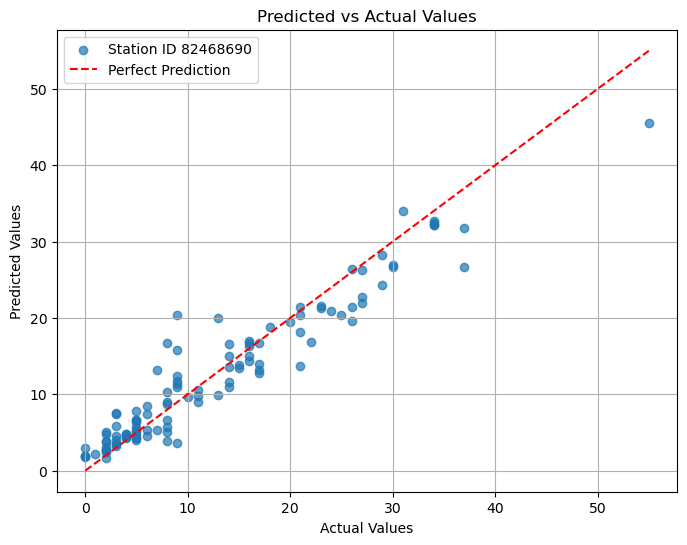

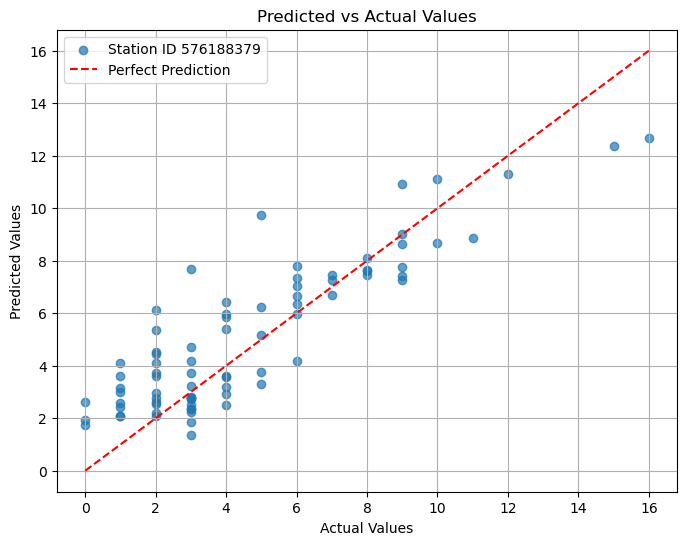

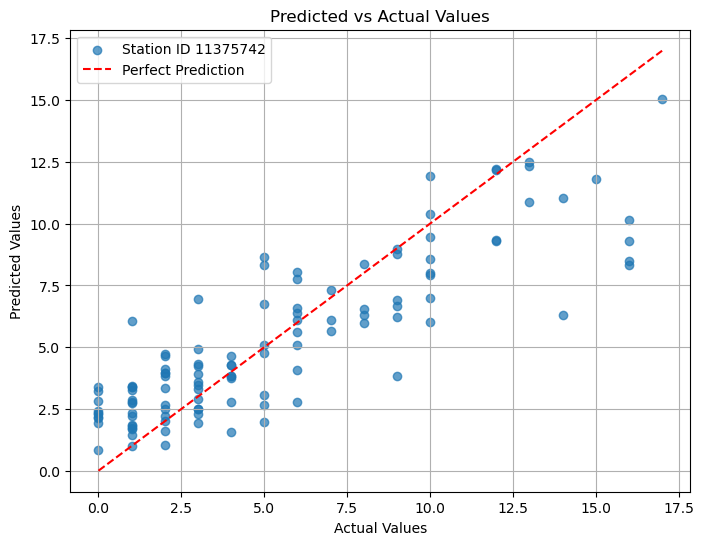

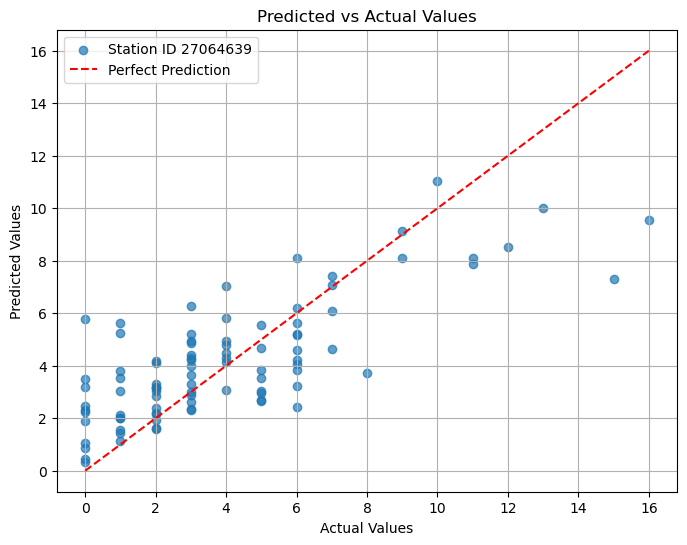

In [37]:
station_ids_to_include = [82458977, 6497, 1062882947, 82468690, 576188379, 11375742, 27064639]

X_test['actual'] = y_test.values
X_test['predicted'] = y_pred_rf
X_test['station_id'] = df.loc[y_test.index, 'station_id']

for id in station_ids_to_include:
    station_id_to_plot = id
    filtered_df = X_test[X_test['station_id'] == station_id_to_plot]

    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df['actual'], filtered_df['predicted'], alpha=0.7, label=f'Station ID {station_id_to_plot}')
    plt.plot([filtered_df['actual'].min(), filtered_df['actual'].max()],
             [filtered_df['actual'].min(), filtered_df['actual'].max()],
             color='red', linestyle='--', label='Perfect Prediction')

    plt.title('Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid()
    plt.show()

## XGBoost

In [335]:
from xgboost import XGBRegressor
import time

In [336]:
X = df[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    max_depth=6,  # Maximum depth of trees
    learning_rate=0.1,  # Step size shrinkage
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for each tree
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Measure training time
start_time = time.time()

# Train the model
xgb_model.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Predict the target variable on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation results
print("XGBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Training Time: 0.15 seconds
XGBoost Regressor Performance:
Mean Absolute Error (MAE): 2.010415034977625
Mean Squared Error (MSE): 8.106363321878232
Root Mean Squared Error (RMSE): 2.8471675963803453
R² Score: 0.8126217126846313


## XGBoost Grid Search

In [340]:
X = df[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees
    'max_depth': [5, 7, 9],                    # Maximum depth
    'learning_rate': [0.05, 0.1, 0.2],         # Learning rate
    'subsample': [0.6, 0.8, 1.0],              # Fraction of samples
    'colsample_bytree': [0.6, 0.8, 1.0]        # Fraction of features
}

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',      # Metric for evaluation
    cv=5,              # 5-fold cross-validation
    verbose=2,         # Progress output
    n_jobs=-1          # Use all CPU cores
)

# Measure time
start_time = time.time()

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

end_time = time.time()

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = mse_best_xgb ** 0.5
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print results
print(f"Grid search completed in {(end_time - start_time) / 60:.2f} minutes.")
print("\nBest Parameters from Grid Search:")
print(best_params)

print("\nPerformance of Best XGBoost Model:")
print(f"Mean Absolute Error (MAE): {mae_best_xgb}")
print(f"Mean Squared Error (MSE): {mse_best_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb}")
print(f"R² Score: {r2_best_xgb}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Grid search completed in 27.13 minutes.

Best Parameters from Grid Search:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}

Performance of Best XGBoost Model:
Mean Absolute Error (MAE): 3.756655508083094
Mean Squared Error (MSE): 25.898726889179102
Root Mean Squared Error (RMSE): 5.089079178906445
R² Score: 0.7924156188964844


## LightBGM

In [342]:
from lightgbm import LGBMRegressor

In [343]:
X = df[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
# Initialize the LightGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=100,       # Number of trees
    max_depth=5,            # Maximum tree depth
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Fraction of samples for each tree
    colsample_bytree=0.8,   # Fraction of features for each tree
    num_leaves=20,
    min_child_samples=10,
    random_state=42         # For reproducibility
)

# Train the model on the training data
lgbm_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate evaluation metrics
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mse_lgbm ** 0.5
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print evaluation results
print("LightGBM Performance:")
print(f"Mean Absolute Error (MAE): {mae_lgbm}")
print(f"Mean Squared Error (MSE): {mse_lgbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm}")
print(f"R² Score: {r2_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1511
[LightGBM] [Info] Number of data points in the train set: 603480, number of used features: 9
[LightGBM] [Info] Start training from score 12.376167
LightGBM Performance:
Mean Absolute Error (MAE): 6.499539483017164
Mean Squared Error (MSE): 76.0552120286684
Root Mean Squared Error (RMSE): 8.72096393919092
R² Score: 0.3903995024749255


## LightBGM Grid Search

In [345]:
X = df[['latitude', 'longitude', 'hour_of_week_sin', 'hour_of_week_cos', 'temp', 'feelslike', 'precip', 'snow', 'windgust']]  # All features
y = df['num_bikes_available']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [346]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [5, 10, 20],
}

# Initialize LightGBM Regressor
lgbm = LGBMRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='r2',      # Metric for evaluation
    cv=5,              # 5-fold cross-validation
    verbose=2,         # Progress output
    n_jobs=-1          # Use all available CPU cores
)

# Measure time
start_time = time.time()

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

end_time = time.time()

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_lgbm_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

# Calculate evaluation metrics
mae_best_lgbm = mean_absolute_error(y_test, y_pred_best_lgbm)
mse_best_lgbm = mean_squared_error(y_test, y_pred_best_lgbm)
rmse_best_lgbm = mse_best_lgbm ** 0.5
r2_best_lgbm = r2_score(y_test, y_pred_best_lgbm)

# Print results
print(f"Grid search completed in {(end_time - start_time) / 60:.2f} minutes.")
print("\nBest Parameters from Grid Search:")
print(best_params)

print("\nPerformance of Best LightGBM Model:")
print(f"Mean Absolute Error (MAE): {mae_best_lgbm}")
print(f"Mean Squared Error (MSE): {mse_best_lgbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_lgbm}")
print(f"R² Score: {r2_best_lgbm}")


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1511
[LightGBM] [Info] Number of data points in the train set: 603480, number of used features: 9
[LightGBM] [Info] Start training from score 12.376167
Grid search completed in 192.60 minutes.

Best Parameters from Grid Search:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.6}

Performance of Best LightGBM Model:
Mean Absolute Error (MAE): 5.232445795935024
Mean Squared Error (MSE): 49.29215206484168
Root Mean Squared Error (RMSE): 7.020836991758296
R² Score: 0.604911752642507


## Linear Regression

In [283]:
from sklearn.linear_model import LinearRegression

In [292]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Model Performance:
Mean Absolute Error (MAE): 4.453081118652517
Mean Squared Error (MSE): 34.405612114612524
Root Mean Squared Error (RMSE): 5.865629728734377
R² Score: 0.20471553304052548
